### In this document, we recreate the $\Delta R$ between the lepton pairs graph from the Analysis note( Figure 5)

In [3]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 

<module 'sidm.tools.sidm_processor' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/sidm_processor.py'>

### process all the data sets required in the analysis , we use the same files used in the dark photon Pt analysis. Also we use the runner method to process all the data.

In [4]:
fileset = {
    "2Mu2E_100GeV_5GeV_4mm"    : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_1.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_2.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_3.root"
                                 ],
    "2Mu2E_150GeV_5GeV_2p7mm" : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_1.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_2.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_3.root"
                                 ],
    "2Mu2E-200GeV_5GeV_2mm"   : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_1.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_2.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_3.root"
                                ],
    "2Mu2E-500GeV_5GeV_0p8mm" : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_1.root",
                               "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_2.root",
                                 "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_3.root"
                                ],
    "2Mu2E-800GeV_5GeV_0p5"   : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_1.root",
                              "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_2.root",
                                "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_3.root"
                                ],
    "2Mu2E-1000Gev_5Gev_0p4"  : ["root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018//SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_154240/0000/ffNtuple_1.root",
                                ]}
   



In [5]:

ch = "2mu2e"
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e",
        
        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)



Output()

Output()

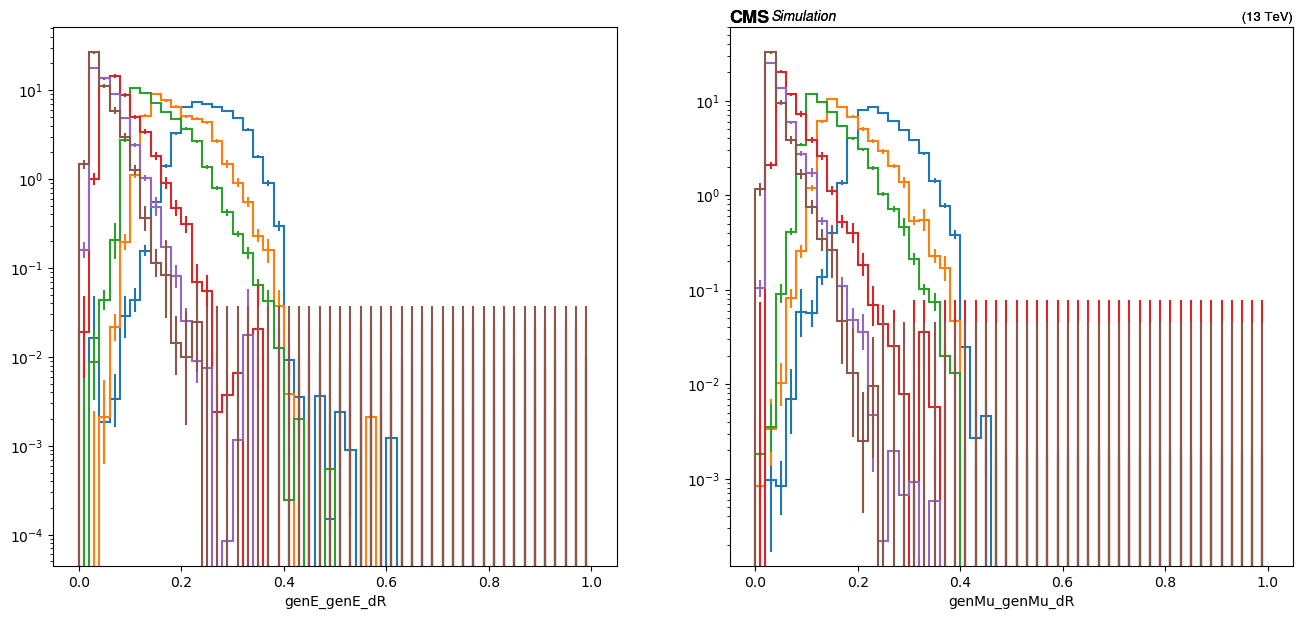

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))
utilities.plot([output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genE_genE_dR"][ch,:],
                output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genE_genE_dR"][ch,:],
                output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE_genE_dR"][ch,:],
                output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genE_genE_dR"][ch,:],
                output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genE_genE_dR"][ch,:],
                output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genE_genE_dR"][ch,:]],ax=ax1, density=True)

utilities.plot([output["out"]["2Mu2E_100GeV_5GeV_4mm"]["hists"]["genMu_genMu_dR"][ch,:],
                output["out"]["2Mu2E_150GeV_5GeV_2p7mm"]["hists"]["genMu_genMu_dR"][ch,:],
                output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu_genMu_dR"][ch,:],
                output["out"]["2Mu2E_500GeV_5GeV_0p8mm"]["hists"]["genMu_genMu_dR"][ch,:],
                output["out"]["2Mu2E_800GeV_5GeV_0p5mm"]["hists"]["genMu_genMu_dR"][ch,:],
                output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genMu_genMu_dR"][ch,:]],ax=ax2, density=True)
ax1.set_yscale('log')
ax2.set_yscale('log')